In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 50
N_CLASSES = 7
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)'
MODEL_NAME = 'bert-base-multilingual-uncased'
dir = '../../../Dataset/Updated_Dataset'
path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Multi/saved_models/{NAME}'
class_names = ['neutral', 'sadness', 'joy', 'anger', 'surprise', 'fear', 'disgust']

In [3]:
train_df = pd.read_csv(f'{dir}/train_data.csv')
val_df = pd.read_csv(f'{dir}/val_data.csv')
test_df = pd.read_csv(f'{dir}/test_data.csv')

train_texts = train_df['tweet'].values
val_texts = val_df['tweet'].values
test_texts = test_df['tweet'].values

In [4]:
train_df

,tweet,label,aspect,anger,disgust,fear,joy,neutral,sadness,surprise,char_length,word_length
0,the first batch of invitations to the power wr...,0,neutral,0,0,0,0,1,0,0,124,26
1,do not make me do the emotional labor of answe...,1,neutral,0,0,0,0,1,0,0,58,13
2,in politicalmedical news there be an impact st...,0,surprise,0,0,0,0,0,0,1,69,12
3,there be no product in sf,0,sadness,0,0,0,0,0,1,0,25,6
4,dad look bianca it be the first time you dress...,0,surprise,0,0,0,0,0,0,1,82,18
...,...,...,...,...,...,...,...,...,...,...,...,...
5416,i be completely worthless,1,sadness,0,0,0,0,0,1,0,25,4
5417,lesson if you do not do the work it will not work,0,sadness,0,0,0,0,0,1,0,49,12
5418,fyi someone be scamming my followers with a fa...,0,sadness,0,0,0,0,0,1,0,192,38
5419,watch the new campaign video an amaze inspire ...,0,surprise,0,0,0,0,0,0,1,82,16


In [5]:
train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [6]:
train_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

the first batch of invitations to the power write course be go out now spring21 batch if you get an email from ben you be in [1 0 0 0 0 0 0]
do not make me do the emotional labor of answer how be you [1 0 0 0 0 0 0]
in politicalmedical news there be an impact stool in our body politic [0 0 0 0 1 0 0]
there be no product in sf [0 1 0 0 0 0 0]
dad look bianca it be the first time you dress up like an anime girl me die inside [0 0 0 0 1 0 0]


In [8]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i])
    , train_labels[i])

first batch invitations power write course go spring21 batch get email ben [1 0 0 0 0 0 0]
make emotional labor answer [1 0 0 0 0 0 0]
politicalmedical news impact stool body politic [0 0 0 0 1 0 0]
product sf [0 1 0 0 0 0 0]
dad look bianca first time dress like anime girl die inside [0 0 0 0 1 0 0]


In [9]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [10]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)
print(model)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [11]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.25it/s, loss=0.32] 


Train loss 0.40123682758387397 accuracy 0.006640841173215274
Validation loss 0.3468660273050007 accuracy 0.08175559380378658
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.08175559380378658
Epoch 1/50
----------


Training Progress: 100%|██████████| 85/85 [00:34<00:00,  2.47it/s, loss=0.265]


Train loss 0.3211725084220662 accuracy 0.25567238516878804
Validation loss 0.30490892498116745 accuracy 0.3588640275387263
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.3588640275387263
Epoch 2/50
----------


Training Progress: 100%|██████████| 85/85 [00:34<00:00,  2.43it/s, loss=0.227]


Train loss 0.27147027236573834 accuracy 0.47168419110865156
Validation loss 0.2940535764945181 accuracy 0.4440619621342513
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.4440619621342513
Epoch 3/50
----------


Training Progress: 100%|██████████| 85/85 [00:34<00:00,  2.43it/s, loss=0.183]


Train loss 0.23229161869077122 accuracy 0.5768308430178933
Validation loss 0.28948633608065155 accuracy 0.4974182444061962
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.4974182444061962
Epoch 4/50
----------


Training Progress: 100%|██████████| 85/85 [00:34<00:00,  2.43it/s, loss=0.142]


Train loss 0.19053739817703472 accuracy 0.6843755764619074
Validation loss 0.29628396504803706 accuracy 0.5283993115318416
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.5283993115318416
Epoch 5/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.41it/s, loss=0.0974]


Train loss 0.1560321471270393 accuracy 0.7662792842648958
Validation loss 0.3032444456690236 accuracy 0.5309810671256454
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.5309810671256454
Epoch 6/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.41it/s, loss=0.0672]


Train loss 0.13449698669068955 accuracy 0.8120273012359344
Validation loss 0.327530656990252 accuracy 0.5335628227194492
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.5335628227194492
Epoch 7/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.41it/s, loss=0.0635]


Train loss 0.11043695526964524 accuracy 0.8557461722929349
Validation loss 0.33472024923876714 accuracy 0.5516351118760757
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.5516351118760757
Epoch 8/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.42it/s, loss=0.0595]


Train loss 0.09808743000030518 accuracy 0.8695812580704667
Validation loss 0.3555128354775278 accuracy 0.5344234079173839
No improvement in validation accuracy for 1 epochs.
Epoch 9/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.37it/s, loss=0.0392]


Train loss 0.07547675840118352 accuracy 0.9101641763512267
Validation loss 0.3833489747423875 accuracy 0.5413080895008606
No improvement in validation accuracy for 2 epochs.
Epoch 10/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.39it/s, loss=0.0379]


Train loss 0.05939486129757236 accuracy 0.9337760560782143
Validation loss 0.38750863388965007 accuracy 0.5507745266781411
No improvement in validation accuracy for 3 epochs.
Epoch 11/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.41it/s, loss=0.0303]


Train loss 0.051742630977840987 accuracy 0.9404168972514296
Validation loss 0.40066652705794886 accuracy 0.5559380378657487
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.5559380378657487
Epoch 12/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.41it/s, loss=0.0235]


Train loss 0.04549527501358706 accuracy 0.9498247555801512
Validation loss 0.41401300461668716 accuracy 0.5507745266781411
No improvement in validation accuracy for 1 epochs.
Epoch 13/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.42it/s, loss=0.0237]


Train loss 0.038076040028210946 accuracy 0.9618151632540122
Validation loss 0.4286746774849139 accuracy 0.5593803786574871
Model and tokenizer saved at epoch 13
Checkpoint saved: Improved validation accuracy at epoch 13: 0.5593803786574871
Epoch 14/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.37it/s, loss=0.0222]


Train loss 0.03437959810390192 accuracy 0.9634753735473159
Validation loss 0.4658885927576768 accuracy 0.5249569707401033
No improvement in validation accuracy for 1 epochs.
Epoch 15/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.41it/s, loss=0.0106]


Train loss 0.038805586822769224 accuracy 0.9581258070466704
Validation loss 0.4423326646026812 accuracy 0.5585197934595525
No improvement in validation accuracy for 2 epochs.
Epoch 16/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.43it/s, loss=0.0492] 


Train loss 0.03151177279651165 accuracy 0.9691938756686959
Validation loss 0.45865022979284586 accuracy 0.5542168674698795
No improvement in validation accuracy for 3 epochs.
Epoch 17/50
----------


Training Progress: 100%|██████████| 85/85 [00:36<00:00,  2.35it/s, loss=0.0135]


Train loss 0.03152129369623521 accuracy 0.9632909057369489
Validation loss 0.45318689628651265 accuracy 0.5533562822719449
No improvement in validation accuracy for 4 epochs.
Epoch 18/50
----------


Training Progress: 100%|██████████| 85/85 [00:35<00:00,  2.39it/s, loss=0.0182] 


Train loss 0.0225979688741705 accuracy 0.9769415237041136
Validation loss 0.4802628818311189 accuracy 0.5542168674698795
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


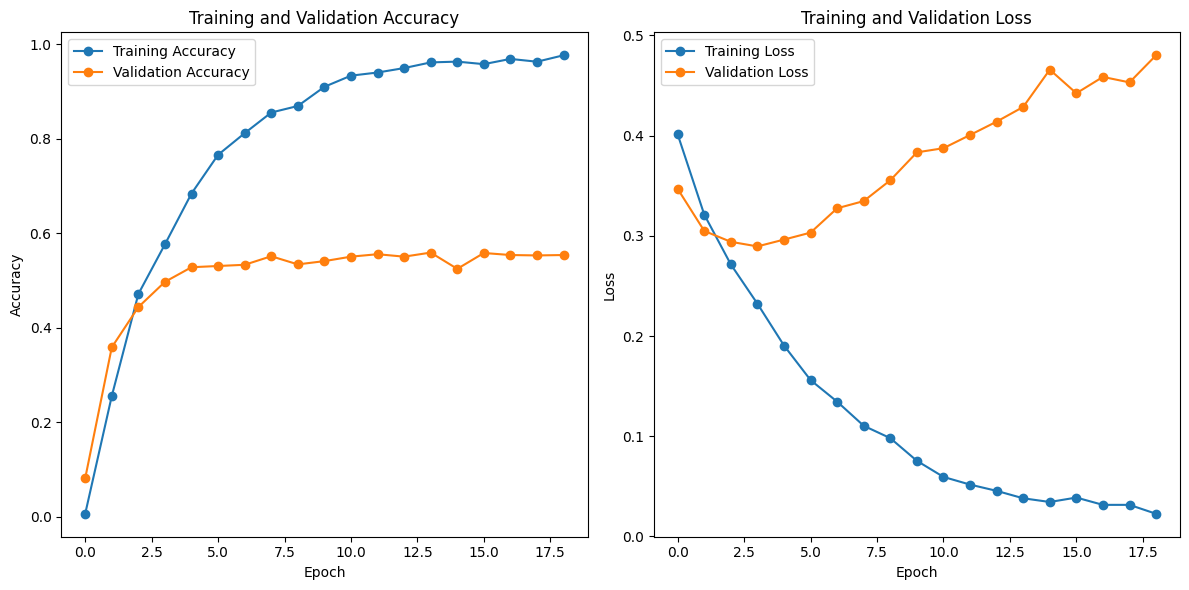

In [12]:
hlp.plot_history(history)

In [13]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Multi/saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [14]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.5585197934595525 Test Loss: 0.42368395234409134


Accuracy: 0.58
F1 Score: 0.59
Precision: 0.61
Recall: 0.58

Classification Report:
              precision    recall  f1-score   support

     neutral       0.63      0.63      0.63       412
     sadness       0.73      0.56      0.64       310
         joy       0.54      0.53      0.54       208
       anger       0.53      0.48      0.51       135
    surprise       0.27      0.60      0.37        40
        fear       0.51      0.68      0.58        53
     disgust       0.10      0.50      0.17         4

    accuracy                           0.58      1162
   macro avg       0.47      0.57      0.49      1162
weighted avg       0.61      0.58      0.59      1162



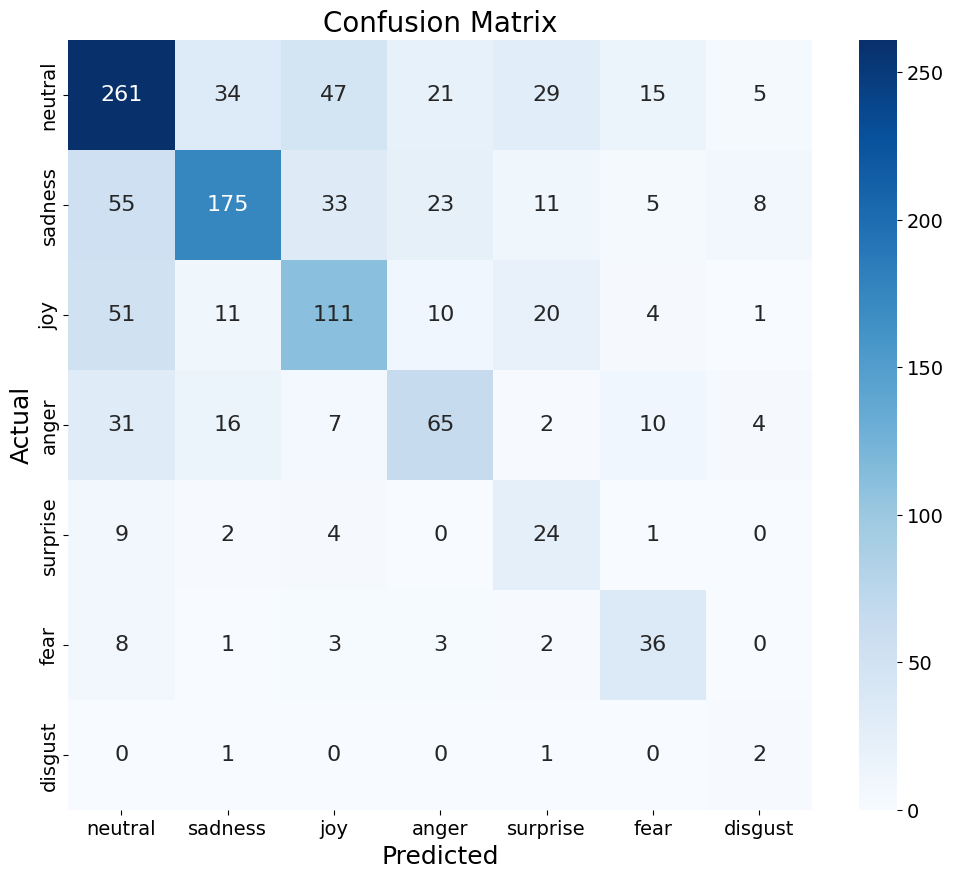

In [15]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)